In [25]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from preprocessing import *
from split_data import *
from training_models import *
from load_models import *
import random
from load_data import *
from metric import metrics_for_binary_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [7]:
wave_info, demo_info, outcomes, grade, paitnet_id = get_dataset(path)

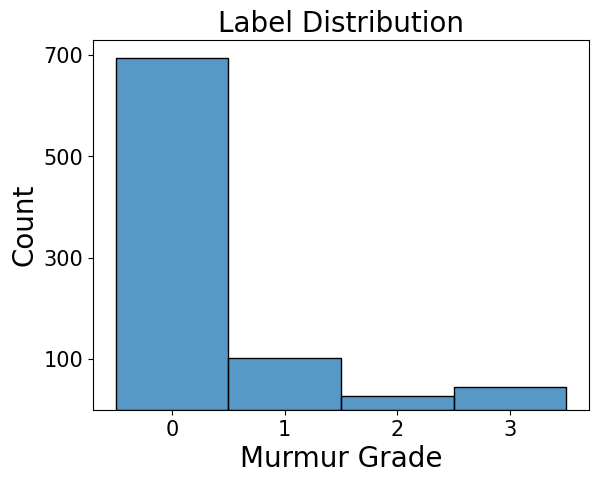

In [8]:
sns.histplot(np.sort(grade).astype(str))
plt.xticks([0,1,2,3], fontsize = 15)
plt.yticks([100, 300, 500, 700], fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Murmur Grade', fontsize = 20)
plt.title('Label Distribution', fontsize = 20)
plt.show()

([], [])

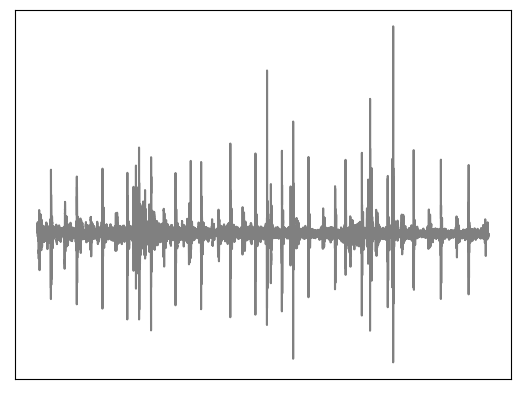

In [9]:
plt.plot(wave_info[0][0][0], color = 'grey')
plt.xticks([])
plt.yticks([])

# Step 2. Split Data

In [10]:
train_x, test_x, train_outcome, test_outcome, train_demo, test_demo, train_grade, test_grade, fold, mur_list, train_sub_id, test_sub_id = get_split_for_murmurnet(
                                            wave_info, demo_info, outcomes, grade, test_size = 0.2, id_set = paitnet_id)

# mur_list = neg_idx, pos_idx, strong_idx, weak_idx, inno_idx

In [11]:
len(train_x), len(test_x)

(484, 122)

# Step 3. Training

In [12]:
from sklearn.model_selection import train_test_split

ensemble1, ensemble2 = train_test_split(mur_list[1], test_size = len(mur_list[2]), random_state = 42)

In [13]:
# Define sample of TCN and delete in each fold
from sklearn.model_selection import train_test_split
ensemble1, ensemble2 = train_test_split(mur_list[1], test_size = len(mur_list[2]), random_state = 42)

murmurnet_domain1 = np.concatenate(  [mur_list[0], mur_list[1]] ) # total domain
murmurnet_domain2 = np.concatenate(  [mur_list[0], mur_list[2]] ) # strong domain
murmurnet_domain3 = np.concatenate(  [mur_list[0], mur_list[3]] ) # weak domain
murmurnet_domain4 = np.concatenate(  [mur_list[0], ensemble1] ) # ensemble1 domain (correspond to weak domain)
murmurnet_domain5 = np.concatenate(  [mur_list[0], ensemble2] ) # ensemble2 domain (correspond to strong domain)

# Training domain
murmurnet_domain = murmurnet_domain1.copy() # Data domain shift

for i in range(0, 5):
    temp_fold = fold[i]
    del_idx = []
    for j in range(0, len(temp_fold)):
        if temp_fold[j] not in murmurnet_domain:
            del_idx.append(j)
    fold[i] = np.delete(temp_fold, del_idx)

In [14]:
train = [[0,1,2], [1,2,3], [2,3,4], [3,4,0], [4,0,1]]
valid1 = [3,4,0,1,2]
valid2 = [4,0,1,2,3]
sampling_rate = 2000

824 282 266
(18889, 1, 2000) (6377, 1, 2000) (6218, 2000, 1)
(18889,) (6377,) (6218,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 997]             224
            Conv1d-2             [-1, 128, 997]           4,096
            Conv1d-3             [-1, 128, 999]          49,280
            Conv1d-4             [-1, 128, 999]          49,280
           Chomp1d-5             [-1, 128, 997]               0
           Chomp1d-6             [-1, 128, 997]               0
               ELU-7             [-1, 128, 997]               0
               ELU-8             [-1, 128, 997]               0
            Conv1d-9             [-1, 128, 999]          49,280
           Conv1d-10             [-1, 128, 999]          49,280
          Chomp1d-11             [-1, 128, 997]               0
          Chomp1d-12             [-1, 128, 997]               0
              ELU

100%|██████████| 147/147 [00:16<00:00,  8.75it/s]


Epoch:  1
Loss:  0.35407217617343084
AUROC:  0.6278883652048713


100%|██████████| 49/49 [00:01<00:00, 27.50it/s]


model_saved!
Epoch:  1
Val_Loss:  3.211919857531178
Val_AUROC:  0.5395957061780429


100%|██████████| 147/147 [00:16<00:00,  8.93it/s]


Epoch:  2
Loss:  0.37098368434678936
AUROC:  0.6687611013285699


100%|██████████| 49/49 [00:01<00:00, 28.66it/s]


model_saved!
Epoch:  2
Val_Loss:  0.4266232282531504
Val_AUROC:  0.59797311782854


100%|██████████| 147/147 [00:16<00:00,  8.89it/s]


Epoch:  3
Loss:  0.3322252493326358
AUROC:  0.7174187691866236


100%|██████████| 49/49 [00:01<00:00, 27.18it/s]


model_saved!
Epoch:  3
Val_Loss:  0.39653743590627394
Val_AUROC:  0.6389028483574112


100%|██████████| 147/147 [00:16<00:00,  8.98it/s]


Epoch:  4
Loss:  0.25659841780557113
AUROC:  0.8140787346957784


100%|██████████| 49/49 [00:01<00:00, 28.25it/s]


model_saved!
Epoch:  4
Val_Loss:  0.3701189224209104
Val_AUROC:  0.827747432408123


100%|██████████| 147/147 [00:16<00:00,  8.90it/s]


Epoch:  5
Loss:  0.1549228739221484
AUROC:  0.9350682214304641


100%|██████████| 49/49 [00:01<00:00, 28.74it/s]


model_saved!
Epoch:  5
Val_Loss:  0.26121724837896776
Val_AUROC:  0.8728768464768679


100%|██████████| 147/147 [00:16<00:00,  8.85it/s]


Epoch:  6
Loss:  0.11435690678047894
AUROC:  0.9678808319932777


100%|██████████| 49/49 [00:01<00:00, 28.79it/s]


model_saved!
Epoch:  6
Val_Loss:  0.245602653494903
Val_AUROC:  0.9027685589001009


100%|██████████| 147/147 [00:16<00:00,  8.92it/s]


Epoch:  7
Loss:  0.09343794823250398
AUROC:  0.9783235772553042


100%|██████████| 49/49 [00:01<00:00, 29.40it/s]


model_saved!
Epoch:  7
Val_Loss:  0.26345559589716855
Val_AUROC:  0.9065279841874839


100%|██████████| 147/147 [00:16<00:00,  8.95it/s]


Epoch:  8
Loss:  0.07814273654109465
AUROC:  0.984892642204936


100%|██████████| 49/49 [00:01<00:00, 28.27it/s]


model_saved!
Epoch:  8
Val_Loss:  0.2556433609249641
Val_AUROC:  0.9116686503819658


100%|██████████| 147/147 [00:16<00:00,  8.92it/s]


Epoch:  9
Loss:  0.07363944154131372
AUROC:  0.9873802081070014


100%|██████████| 49/49 [00:01<00:00, 28.96it/s]


model_saved!
Epoch:  9
Val_Loss:  0.2928814547402518
Val_AUROC:  0.9195364535463196


100%|██████████| 147/147 [00:16<00:00,  8.91it/s]


Epoch:  10
Loss:  0.06118481502342387
AUROC:  0.9904276130832746


100%|██████████| 49/49 [00:01<00:00, 29.07it/s]


Epoch:  10
Val_Loss:  0.35858525883178327
Val_AUROC:  0.867436852782708
Finished Training
822 266 284
(18657, 1, 2000) (6218, 1, 2000) (6609, 2000, 1)
(18657,) (6218,) (6609,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 997]             224
            Conv1d-2             [-1, 128, 997]           4,096
            Conv1d-3             [-1, 128, 999]          49,280
            Conv1d-4             [-1, 128, 999]          49,280
           Chomp1d-5             [-1, 128, 997]               0
           Chomp1d-6             [-1, 128, 997]               0
               ELU-7             [-1, 128, 997]               0
               ELU-8             [-1, 128, 997]               0
            Conv1d-9             [-1, 128, 999]          49,280
           Conv1d-10             [-1, 128, 999]          49,280
          Chomp1d-11             [-1, 128, 997]        

100%|██████████| 145/145 [00:16<00:00,  8.99it/s]


Epoch:  1
Loss:  0.371473390891634
AUROC:  0.5718052955947042


100%|██████████| 48/48 [00:01<00:00, 29.18it/s]


model_saved!
Epoch:  1
Val_Loss:  0.38776800781488413
Val_AUROC:  0.4349252771989042


100%|██████████| 145/145 [00:16<00:00,  8.98it/s]


Epoch:  2
Loss:  0.35269794967667795
AUROC:  0.6615921127830477


100%|██████████| 48/48 [00:01<00:00, 29.22it/s]


model_saved!
Epoch:  2
Val_Loss:  0.3655305020511151
Val_AUROC:  0.6425485576630089


100%|██████████| 145/145 [00:16<00:00,  8.94it/s]


Epoch:  3
Loss:  0.30173696217865786
AUROC:  0.7837377543544192


100%|██████████| 48/48 [00:01<00:00, 29.22it/s]


model_saved!
Epoch:  3
Val_Loss:  0.34392016008496284
Val_AUROC:  0.8488857041694096


100%|██████████| 145/145 [00:16<00:00,  8.91it/s]


Epoch:  4
Loss:  0.18736131317142785
AUROC:  0.9110174841597244


100%|██████████| 48/48 [00:01<00:00, 28.86it/s]


model_saved!
Epoch:  4
Val_Loss:  0.25935280090197926
Val_AUROC:  0.8680993106123155


100%|██████████| 145/145 [00:16<00:00,  8.86it/s]


Epoch:  5
Loss:  0.13997865070042936
AUROC:  0.959218855795382


100%|██████████| 48/48 [00:01<00:00, 28.25it/s]


model_saved!
Epoch:  5
Val_Loss:  0.2521303743124008
Val_AUROC:  0.8876343132812651


100%|██████████| 145/145 [00:16<00:00,  8.83it/s]


Epoch:  6
Loss:  0.11658897060772468
AUROC:  0.9726081070484676


100%|██████████| 48/48 [00:01<00:00, 28.82it/s]


model_saved!
Epoch:  6
Val_Loss:  0.25327667419333016
Val_AUROC:  0.9074414791069654


100%|██████████| 145/145 [00:16<00:00,  8.90it/s]


Epoch:  7
Loss:  0.09945896108602649
AUROC:  0.9801311976240857


100%|██████████| 48/48 [00:01<00:00, 28.89it/s]


Epoch:  7
Val_Loss:  0.34097935693959397
Val_AUROC:  0.8716145598436462


100%|██████████| 145/145 [00:16<00:00,  8.86it/s]


Epoch:  8
Loss:  0.07652534202126594
AUROC:  0.9871135101049693


100%|██████████| 48/48 [00:01<00:00, 28.22it/s]


Epoch:  8
Val_Loss:  0.23148789893214905
Val_AUROC:  0.8969307137106849


100%|██████████| 145/145 [00:16<00:00,  8.81it/s]


Epoch:  9
Loss:  0.06567809271850976
AUROC:  0.9925574493187002


100%|██████████| 48/48 [00:01<00:00, 28.10it/s]


Finished Training
803 284 285
(18631, 1, 2000) (6609, 1, 2000) (6244, 2000, 1)
(18631,) (6609,) (6244,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 997]             224
            Conv1d-2             [-1, 128, 997]           4,096
            Conv1d-3             [-1, 128, 999]          49,280
            Conv1d-4             [-1, 128, 999]          49,280
           Chomp1d-5             [-1, 128, 997]               0
           Chomp1d-6             [-1, 128, 997]               0
               ELU-7             [-1, 128, 997]               0
               ELU-8             [-1, 128, 997]               0
            Conv1d-9             [-1, 128, 999]          49,280
           Conv1d-10             [-1, 128, 999]          49,280
          Chomp1d-11             [-1, 128, 997]               0
          Chomp1d-12             [-1, 128, 997]               0

100%|██████████| 145/145 [00:16<00:00,  8.97it/s]


Epoch:  1
Loss:  0.3678114757455628
AUROC:  0.5857144467089933


100%|██████████| 51/51 [00:01<00:00, 27.99it/s]


model_saved!
Epoch:  1
Val_Loss:  0.3655237479537142
Val_AUROC:  0.6911948649771036


100%|██████████| 145/145 [00:16<00:00,  8.83it/s]


Epoch:  2
Loss:  0.3627118152791053
AUROC:  0.6392473196978593


100%|██████████| 51/51 [00:01<00:00, 28.28it/s]


model_saved!
Epoch:  2
Val_Loss:  0.3677367480362163
Val_AUROC:  0.7175630142450657


100%|██████████| 145/145 [00:16<00:00,  8.86it/s]


Epoch:  3
Loss:  0.3624487618947851
AUROC:  0.5908550623400376


100%|██████████| 51/51 [00:01<00:00, 28.22it/s]


Epoch:  3
Val_Loss:  0.3642233177727344
Val_AUROC:  0.6338867597704947


100%|██████████| 145/145 [00:16<00:00,  8.82it/s]


Epoch:  4
Loss:  0.3661995281433235
AUROC:  0.4863056159340568


100%|██████████| 51/51 [00:01<00:00, 27.44it/s]


Epoch:  4
Val_Loss:  0.3645606987616596
Val_AUROC:  0.5027459983374521


100%|██████████| 145/145 [00:16<00:00,  8.58it/s]


Epoch:  5
Loss:  0.3587847725070755
AUROC:  0.554129196535703


100%|██████████| 51/51 [00:01<00:00, 26.13it/s]


Finished Training
832 285 255
(19204, 1, 2000) (6244, 1, 2000) (6036, 2000, 1)
(19204,) (6244,) (6036,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 997]             224
            Conv1d-2             [-1, 128, 997]           4,096
            Conv1d-3             [-1, 128, 999]          49,280
            Conv1d-4             [-1, 128, 999]          49,280
           Chomp1d-5             [-1, 128, 997]               0
           Chomp1d-6             [-1, 128, 997]               0
               ELU-7             [-1, 128, 997]               0
               ELU-8             [-1, 128, 997]               0
            Conv1d-9             [-1, 128, 999]          49,280
           Conv1d-10             [-1, 128, 999]          49,280
          Chomp1d-11             [-1, 128, 997]               0
          Chomp1d-12             [-1, 128, 997]               0

100%|██████████| 150/150 [00:17<00:00,  8.61it/s]


Epoch:  1
Loss:  0.39653782447179164
AUROC:  0.6102601396865324


100%|██████████| 48/48 [00:01<00:00, 26.38it/s]


model_saved!
Epoch:  1
Val_Loss:  0.3914306983351707
Val_AUROC:  0.605708524586372


100%|██████████| 150/150 [00:17<00:00,  8.65it/s]


Epoch:  2
Loss:  0.38336995224157944
AUROC:  0.6813759980678683


100%|██████████| 48/48 [00:01<00:00, 24.16it/s]


model_saved!
Epoch:  2
Val_Loss:  0.3270921347041925
Val_AUROC:  0.713168249380606


100%|██████████| 150/150 [00:17<00:00,  8.59it/s]


Epoch:  3
Loss:  0.26746231834093714
AUROC:  0.8329352070658917


100%|██████████| 48/48 [00:02<00:00, 23.60it/s]


model_saved!
Epoch:  3
Val_Loss:  0.21636652372156592
Val_AUROC:  0.8642440748035302


100%|██████████| 150/150 [00:17<00:00,  8.50it/s]


Epoch:  4
Loss:  0.18553141263624026
AUROC:  0.9325302356366391


100%|██████████| 48/48 [00:01<00:00, 27.74it/s]


model_saved!
Epoch:  4
Val_Loss:  0.15479676860074204
Val_AUROC:  0.9430475507632761


100%|██████████| 150/150 [00:17<00:00,  8.40it/s]


Epoch:  5
Loss:  0.16014399687449132
AUROC:  0.951882039653718


100%|██████████| 48/48 [00:02<00:00, 21.75it/s]


Epoch:  5
Val_Loss:  0.1705132351877789
Val_AUROC:  0.9412275454556734


100%|██████████| 150/150 [00:18<00:00,  8.25it/s]


Epoch:  6
Loss:  0.1359850716839233
AUROC:  0.9665357723012833


100%|██████████| 48/48 [00:01<00:00, 27.86it/s]


model_saved!
Epoch:  6
Val_Loss:  0.1399485114961862
Val_AUROC:  0.9628560073011305


100%|██████████| 150/150 [00:17<00:00,  8.68it/s]


Epoch:  7
Loss:  0.11973002068698413
AUROC:  0.9758276074181951


100%|██████████| 48/48 [00:01<00:00, 26.84it/s]


Epoch:  7
Val_Loss:  0.12025935668498279
Val_AUROC:  0.9615412138141873


100%|██████████| 150/150 [00:17<00:00,  8.68it/s]


Epoch:  8
Loss:  0.09827603835612542
AUROC:  0.9825860062477032


100%|██████████| 48/48 [00:01<00:00, 26.56it/s]


model_saved!
Epoch:  8
Val_Loss:  0.1065533151074002
Val_AUROC:  0.9636420289773369


100%|██████████| 150/150 [00:17<00:00,  8.69it/s]


Epoch:  9
Loss:  0.08659501061464346
AUROC:  0.9899358220004426


100%|██████████| 48/48 [00:01<00:00, 26.47it/s]


Epoch:  9
Val_Loss:  0.16179546667262912
Val_AUROC:  0.9385776638445624


100%|██████████| 150/150 [00:17<00:00,  8.69it/s]


Epoch:  10
Loss:  0.06823562836895386
AUROC:  0.9926717033062239


100%|██████████| 48/48 [00:01<00:00, 26.02it/s]


Epoch:  10
Val_Loss:  0.14331561916818222
Val_AUROC:  0.9609239847242711
Finished Training
835 255 282
(19071, 1, 2000) (6036, 1, 2000) (6377, 2000, 1)
(19071,) (6036,) (6377,)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 997]             224
            Conv1d-2             [-1, 128, 997]           4,096
            Conv1d-3             [-1, 128, 999]          49,280
            Conv1d-4             [-1, 128, 999]          49,280
           Chomp1d-5             [-1, 128, 997]               0
           Chomp1d-6             [-1, 128, 997]               0
               ELU-7             [-1, 128, 997]               0
               ELU-8             [-1, 128, 997]               0
            Conv1d-9             [-1, 128, 999]          49,280
           Conv1d-10             [-1, 128, 999]          49,280
          Chomp1d-11             [-1, 128, 997]       

100%|██████████| 148/148 [00:16<00:00,  8.83it/s]


Epoch:  1
Loss:  0.3863457160422929
AUROC:  0.6184690049308854


100%|██████████| 47/47 [00:01<00:00, 27.10it/s]


model_saved!
Epoch:  1
Val_Loss:  0.30353747561891026
Val_AUROC:  0.7107260258752325


100%|██████████| 148/148 [00:16<00:00,  8.79it/s]


Epoch:  2
Loss:  0.3855521426208921
AUROC:  0.5394978507134701


100%|██████████| 47/47 [00:01<00:00, 27.63it/s]


Epoch:  2
Val_Loss:  0.27261276860186395
Val_AUROC:  0.6674288194832734


100%|██████████| 148/148 [00:16<00:00,  8.81it/s]


Epoch:  3
Loss:  0.3627416909345098
AUROC:  0.6976440107233642


100%|██████████| 47/47 [00:01<00:00, 28.91it/s]


model_saved!
Epoch:  3
Val_Loss:  0.25129354919524904
Val_AUROC:  0.7162146987721257


100%|██████████| 148/148 [00:17<00:00,  8.67it/s]


Epoch:  4
Loss:  0.3052857540346481
AUROC:  0.8026600491278324


100%|██████████| 47/47 [00:01<00:00, 27.48it/s]


model_saved!
Epoch:  4
Val_Loss:  0.16580767660064902
Val_AUROC:  0.9235920490220364


100%|██████████| 148/148 [00:17<00:00,  8.66it/s]


Epoch:  5
Loss:  0.19193753529642082
AUROC:  0.9201914876009321


100%|██████████| 47/47 [00:01<00:00, 25.98it/s]


model_saved!
Epoch:  5
Val_Loss:  0.1056917609369501
Val_AUROC:  0.9555098810011954


100%|██████████| 148/148 [00:16<00:00,  8.71it/s]


Epoch:  6
Loss:  0.14771924724147933
AUROC:  0.9569561513256586


100%|██████████| 47/47 [00:01<00:00, 26.49it/s]


Epoch:  6
Val_Loss:  0.13689238197625947
Val_AUROC:  0.9469349420223583


100%|██████████| 148/148 [00:17<00:00,  8.54it/s]


Epoch:  7
Loss:  0.11298052662027044
AUROC:  0.9772982189712688


100%|██████████| 47/47 [00:01<00:00, 25.70it/s]


Epoch:  7
Val_Loss:  0.11117008578111517
Val_AUROC:  0.943428098670372


100%|██████████| 148/148 [00:17<00:00,  8.59it/s]


Epoch:  8
Loss:  0.08785948124588344
AUROC:  0.985483780820866


100%|██████████| 47/47 [00:01<00:00, 28.24it/s]


model_saved!
Epoch:  8
Val_Loss:  0.11205054966217659
Val_AUROC:  0.9557217734102218


100%|██████████| 148/148 [00:16<00:00,  8.73it/s]


Epoch:  9
Loss:  0.07231505166714054
AUROC:  0.9913429817302868


100%|██████████| 47/47 [00:01<00:00, 26.86it/s]


Epoch:  9
Val_Loss:  0.10403728187876814
Val_AUROC:  0.948921698559019


100%|██████████| 148/148 [00:16<00:00,  8.79it/s]


Epoch:  10
Loss:  0.056309657212271276
AUROC:  0.9955511778235406


100%|██████████| 47/47 [00:01<00:00, 28.03it/s]


Epoch:  10
Val_Loss:  0.10733568260168777
Val_AUROC:  0.9527637113329124
Finished Training


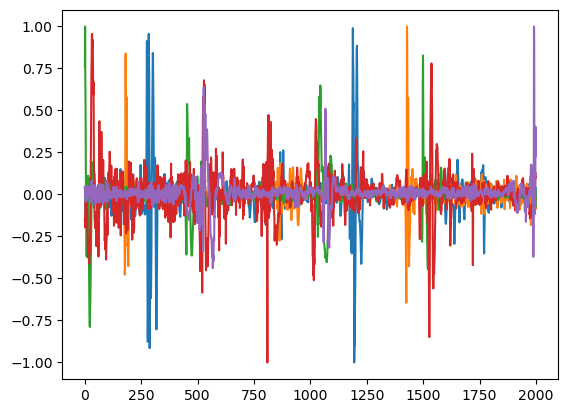

In [29]:
for n_fold in range(0, 5):
    train_fold = train[n_fold] 
    train_fold1 = train_fold[0]
    train_fold2 = train_fold[1]
    train_fold3 = train_fold[2]
    
    valid1_fold = valid1[n_fold]
    valid2_fold = valid2[n_fold]
    
    train_idx = np.concatenate((fold[train_fold1], fold[train_fold2], fold[train_fold3]))
    valid1_idx = fold[valid1_fold]
    valid2_idx = fold[valid2_fold]
    
    train_wav, train_wav_label = generate_pair(train_idx, train_x)
    valid1_wav, valid1_wav_label = generate_pair(valid1_idx, train_x)
    valid2_wav, valid2_wav_label = generate_pair(valid2_idx, train_x)
    print(len(train_wav), len(valid1_wav), len(valid2_wav))
    
    train_features, train_target = segmentation(train_wav, train_wav_label, sampling_rate = sampling_rate, seconds = 1)
    valid1_features, valid1_target = segmentation(valid1_wav, valid1_wav_label, sampling_rate = sampling_rate, seconds = 1)
    valid2_features, valid2_target = segmentation(valid2_wav, valid2_wav_label, sampling_rate = sampling_rate, seconds = 1)
    
    # reshape for Pytorch
    train_features = train_features.reshape((train_features.shape[0], train_features.shape[2], train_features.shape[1]))
    valid1_features = valid1_features.reshape((valid1_features.shape[0], valid1_features.shape[2], valid1_features.shape[1]))
    print(train_features.shape, valid1_features.shape, valid2_features.shape)
    print(train_target.shape, valid1_target.shape, valid2_target.shape)
    
    arr = np.arange(len(train_features))
    np.random.seed(42)
    np.random.shuffle(arr)
    train_features = train_features[arr]
    train_target = train_target[arr]
    plt.plot(train_features[0].flatten())
    
    train_collection = []
    valid_collection = []
    for i in range(0, len(train_features)):
        train_collection.append([train_features[i], np.array([train_target[i]])])
    for i in range(0, len(valid1_features)):
        valid_collection.append([valid1_features[i], np.array([valid1_target[i]])])
    
    # Training
    model_name = 'TCN_ens2_fold{}_'
    model = model_name.format(n_fold+1)
    save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
                                                                         gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 128, learning_rate = 0.001, patience = 3, n_ch = 1, # lr = 0.001
                                                                         model_name = 'tcn') # if train weak model, set batch_size = 128 because of error "Only one class present in y_true"
    df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    df.to_csv(save_path + model + 'model_loss.csv')
    # ##################################################################################################################################################################################################
    # model_name = 'VGG_1sec_fold{}_'
    # model = model_name.format(n_fold+1)
    # save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    # train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
    #                                                                      gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 64, learning_rate = 0.001, patience = 3, n_ch = 1, # lr = 0.001
    #                                                                      model_name = 'vgg16')
    # df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    # df.to_csv(save_path + model + 'model_loss.csv')
    # ##################################################################################################################################################################################################
    # model_name = 'ResNet_1sec_fold{}_'
    # model = model_name.format(n_fold+1)
    # save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    # train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
    #                                                                      gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 64, learning_rate = 0.001, patience = 3, n_ch = 1, # lr = 0.001
    #                                                                      model_name = 'resnet')
    # df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    # df.to_csv(save_path + model + 'model_loss.csv')
    # ##################################################################################################################################################################################################
    # model_name = 'Inception_1sec_fold{}_'
    # model = model_name.format(n_fold+1)
    # save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    # train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
    #                                                                      gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 64, learning_rate = 0.001, patience = 3, n_ch = 1, # lr = 0.001
    #                                                                      model_name = 'inception')
    # df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    # df.to_csv(save_path + model + 'model_loss.csv')
    # ##################################################################################################################################################################################################
    # model_name = 'CTAN_1sec_fold{}_'
    # model = model_name.format(n_fold+1)
    # save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    # train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
    #                                                                      gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 64, learning_rate = 0.0001, patience = 3, n_ch = 1, # lr = 0.001
    #                                                                      model_name = 'ctan')
    # df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    # df.to_csv(save_path + model + 'model_loss.csv')
    # ##################################################################################################################################################################################################
    # model_name = 'ConvNeXt_1sec_fold{}_'
    # model = model_name.format(n_fold+1)
    # save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/'
    # train_loss, train_metric, valid_loss, valid_metric = training_models(train_collection, valid_collection, save_path = save_path + model,
    #                                                                      gpu_num = 1, random_seed = 42, num_epochs = 10, batch_size = 64, learning_rate = 0.001, patience = 3, n_ch = 1, # lr = 0.001
    #                                                                      model_name = 'convnext')
    # df = pd.DataFrame({'train_loss':train_loss, 'train_metric':train_metric, 'valid_loss':valid_loss, 'valid_metric':valid_metric})
    # df.to_csv(save_path + model + 'model_loss.csv')

# Feature extraction

In [15]:
from load_data import *
wave_info, demo_info, outcomes, grade, paitnet_id = get_dataset(path)
train_x, test_x, train_outcome, test_outcome, train_demo, test_demo, train_grade, test_grade, fold, mur_list, train_id, test_id = get_split_for_murmurnet(
                                            wave_info, demo_info, outcomes, grade, paitnet_id, test_size = 0.2)

In [16]:
model_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/saved_models/'

In [17]:
train_murmur_loc = []
for i in range(0, len(train_x)):
    current_patient = train_x[i]
    current_murmur = ''
    for j in range(0, len(current_patient)):
        current_loc = current_patient[j]
        if current_loc[-1] == 'Present':
            current_murmur = current_murmur + current_loc[-2] + '+'
    train_murmur_loc.append(current_murmur)

test_murmur_loc = []
for i in range(0, len(test_x)):
    current_patient = test_x[i]
    current_murmur = ''
    for j in range(0, len(current_patient)):
        current_loc = current_patient[j]
        if current_loc[-1] == 'Present':
            current_murmur = current_murmur + current_loc[-2] + '+'
    test_murmur_loc.append(current_murmur)

In [18]:
train = [[0,1,2], [1,2,3], [2,3,4], [3,4,0], [4,0,1]]
valid1 = [3,4,0,1,2]
valid2 = [4,0,1,2,3]

In [19]:
os.environ["CUDA_VISIBLE_DEVICES"] = str(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [43]:
#######
# channel들 중 min/max/median 뽑아서
#######
#######

train_df_cv = []
valid_df_cv = []
test_df_cv = []
for n_fold in range(0, 5):
    train_fold = train[n_fold]
    train_fold1 = train_fold[0]
    train_fold2 = train_fold[1]
    train_fold3 = train_fold[2]
    
    valid1_fold = valid1[n_fold]
    valid2_fold = valid2[n_fold]
    
    train_idx = np.concatenate((fold[train_fold1], fold[train_fold2], fold[train_fold3], fold[valid1_fold]))
    valid_idx = fold[valid2_fold]
    
    """모델 불러오기"""
    path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/save_models_internal/TCN_ens2_fold{}_model.pt'.format(n_fold + 1)
    param_saved = torch.load(path, map_location = device)
    test_model = load_model(model_name = 'tcn', n_ch = 1).to(device)
    test_model.load_state_dict(param_saved)
    test_model.eval()
    """"""
    
    train_df = pd.DataFrame(np.zeros((len(train_idx), 24)), columns = ['AV_strong_min', 'AV_strong_max', 'AV_strong_median', 'AV_strong_mean',
                                                                       'PV_strong_min', 'PV_strong_max', 'PV_strong_median', 'PV_strong_mean',
                                                                       'TV_strong_min', 'TV_strong_max', 'TV_strong_median', 'TV_strong_mean',
                                                                       'MV_strong_min', 'MV_strong_max', 'MV_strong_median', 'MV_strong_mean',
                                                                       'grade', 'outcome', 'age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']) - 1
    
    valid_df = pd.DataFrame(np.zeros((len(valid_idx), 24)), columns = ['AV_strong_min', 'AV_strong_max', 'AV_strong_median', 'AV_strong_mean',
                                                                       'PV_strong_min', 'PV_strong_max', 'PV_strong_median', 'PV_strong_mean',
                                                                       'TV_strong_min', 'TV_strong_max', 'TV_strong_median', 'TV_strong_mean',
                                                                       'MV_strong_min', 'MV_strong_max', 'MV_strong_median', 'MV_strong_mean',
                                                                       'grade', 'outcome', 'age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']) - 1
    
    test_df = pd.DataFrame(np.zeros((len(test_x), 24)), columns = ['AV_strong_min', 'AV_strong_max', 'AV_strong_median', 'AV_strong_mean',
                                                                   'PV_strong_min', 'PV_strong_max', 'PV_strong_median', 'PV_strong_mean',
                                                                   'TV_strong_min', 'TV_strong_max', 'TV_strong_median', 'TV_strong_mean',
                                                                   'MV_strong_min', 'MV_strong_max', 'MV_strong_median', 'MV_strong_mean',
                                                                   'grade', 'outcome', 'age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']) - 1
    
    train_df['grade'] = train_grade[train_idx]
    valid_df['grade'] = train_grade[valid_idx]
    test_df['grade'] = test_grade
    train_df['outcome'] = train_outcome[train_idx]
    valid_df['outcome'] = train_outcome[valid_idx]
    test_df['outcome'] = test_outcome
    
    train_df['mur_loc'] = [train_murmur_loc[k] for k in train_idx]
    valid_df['mur_loc'] = [train_murmur_loc[k] for k in valid_idx]
    test_df['mur_loc'] = test_murmur_loc
    
    train_df[['age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']] = train_demo[train_idx]
    valid_df[['age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']] = train_demo[valid_idx]
    test_df[['age', 'height', 'weight', 'bmi', 'sex_features', 'is_pregnant']] = test_demo
    
    train_df['patient_id'] = train_id[train_idx]
    valid_df['patient_id'] = train_id[valid_idx]
    test_df['patient_id'] = test_id
    
    for i, idx in enumerate(train_idx):
        current_patient = train_x[idx]
        strong_features = []
        weak_features = []
        for j in range(0, len(current_patient)):
            features = []
            loc_name = current_patient[j][2]
            if loc_name == 'Ph':
                continue
            loc_wave = current_patient[j][0]
            for n in range(0, len(loc_wave) - 4000, 2000):
                features.append(get_wave_features(loc_wave[n: n + 4000], featuresFs = 2000))
            features = np.array(features)
            if len(features) != 0:
                features = features.reshape((len(features), 1, 2000))
                features = torch.Tensor(features)
                features = features.to(device).float()
                pred_strong = test_model(features).cpu().detach().flatten().numpy()
                
                # length.append(len(pred))
                mean_feature_strong = np.mean(pred_strong)
                median_feature_strong = np.median(pred_strong)
                max_feature_strong = np.quantile(pred_strong,  q = 0.95)
                min_feature_strong = np.quantile(pred_strong, q = 0.05)
                
                train_df[loc_name + '_strong_min'][i] = min_feature_strong
                train_df[loc_name + '_strong_max'][i] = max_feature_strong
                train_df[loc_name + '_strong_median'][i] = median_feature_strong
                train_df[loc_name + '_strong_mean'][i] = mean_feature_strong

    for i, idx in enumerate(valid_idx):
        current_patient = train_x[idx]
        strong_features = []
        weak_features = []
        for j in range(0, len(current_patient)):
            features = []
            loc_name = current_patient[j][2]
            if loc_name == 'Ph':
                continue
            loc_wave = current_patient[j][0]
            for n in range(0, len(loc_wave) - 4000, 2000):
                features.append(get_wave_features(loc_wave[n: n + 4000], featuresFs = 2000))
            features = np.array(features)
            if len(features) != 0:
                features = features.reshape((len(features), 1, 2000))
                features = torch.Tensor(features).to(device).float()
                pred_strong = test_model(features).cpu().detach().flatten().numpy()
                
                mean_feature_strong = np.mean(pred_strong)
                median_feature_strong = np.median(pred_strong)
                max_feature_strong = np.quantile(pred_strong,  q = 0.95)
                min_feature_strong = np.quantile(pred_strong, q = 0.05)
                
                valid_df[loc_name + '_strong_min'][i] = min_feature_strong
                valid_df[loc_name + '_strong_max'][i] = max_feature_strong
                valid_df[loc_name + '_strong_median'][i] = median_feature_strong
                valid_df[loc_name + '_strong_mean'][i] = mean_feature_strong
    for i in range(0, len(test_x)):
        current_patient = test_x[i]
        strong_features = []
        weak_features = []
        for j in range(0, len(current_patient)):
            features = []
            loc_name = current_patient[j][2]
            if loc_name == 'Ph':
                continue
            loc_wave = current_patient[j][0]
            for n in range(0, len(loc_wave) - 4000, 2000):
                features.append(get_wave_features(loc_wave[n: n + 4000], featuresFs = 2000))
            features = np.array(features)
            if len(features) != 0:
                features = features.reshape((len(features), 1, 2000))
                features = torch.Tensor(features)
                features = features.to(device).float()
                pred_strong = test_model(features).cpu().detach().flatten().numpy()
                                
                # length.append(len(pred))
                mean_feature_strong = np.mean(pred_strong)
                median_feature_strong = np.median(pred_strong)
                max_feature_strong = np.quantile(pred_strong,  q = 0.95)
                min_feature_strong = np.quantile(pred_strong, q = 0.05)
                
                test_df[loc_name + '_strong_min'][i] = min_feature_strong
                test_df[loc_name + '_strong_max'][i] = max_feature_strong
                test_df[loc_name + '_strong_median'][i] = median_feature_strong
                test_df[loc_name + '_strong_mean'][i] = mean_feature_strong
    train_df_cv.append(train_df)
    valid_df_cv.append(valid_df)
    test_df_cv.append(test_df)

In [44]:
save_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/results_internal/'
save_name = ''
for i in range(0, 5):
    train_df_cv[i].to_csv(save_path + save_name + 'TCN_ens2_train_fold'+ str(i+1) + '.csv')
    valid_df_cv[i].to_csv(save_path + save_name + 'TCN_ens2_valid_fold'+ str(i+1) + '.csv')
    test_df_cv[i].to_csv(save_path + save_name + 'TCN_ens2_test_fold'+ str(i+1) + '.csv')

# Evaluation Mean vs Max

In [23]:
feature_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/results_internal/'
models = 'TCN'

train_list = []
valid_list = []
test_list = []

for i in range(0, 5):
    temp_train = pd.read_csv(feature_path + models + '_train_fold' + str(i+1) + '.csv', index_col = 0)
    temp_valid = pd.read_csv(feature_path + models + '_valid_fold' + str(i+1) + '.csv', index_col = 0)
    temp_test = pd.read_csv(feature_path + models + '_test_fold' + str(i+1) + '.csv', index_col = 0)
    
    temp_train['mur_loc'] = temp_train['mur_loc'].fillna('none|')
    temp_valid['mur_loc'] = temp_valid['mur_loc'].fillna('none')
    temp_test['mur_loc'] = temp_test['mur_loc'].fillna('none')
    
    train_list.append(temp_train)
    valid_list.append(temp_valid)
    test_list.append(temp_test)

In [24]:
sens = []
spec = []
auroc = []
auprc = []
bacc = []
thr = []
input_col = 'mean'

# fpr_list1 = []
# tpr_list1 = []
fpr_list2 = []
tpr_list2 = []

for i in range(0, 5):
    pos_wave = []
    neg_wave = []
    pos_y = []
    neg_y = []
    training_patient = pd.concat([train_list[i]], axis = 0).reset_index(drop = True)
    # training_patient = pd.concat([train_list[i], valid_list[i]], axis = 0).reset_index(drop = True)
    for j in range(0, len(training_patient)):
        if (training_patient['grade'][j] == 0)&(training_patient['outcome'][j] == 0): # Normal
            neg_wave.append(training_patient['AV_strong_'+input_col][j])
            neg_wave.append(training_patient['PV_strong_'+input_col][j])
            neg_wave.append(training_patient['TV_strong_'+input_col][j])
            neg_wave.append(training_patient['MV_strong_'+input_col][j])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 0): # Innocent murmur
            neg_wave.append(training_patient['AV_strong_'+input_col][j])
            neg_wave.append(training_patient['PV_strong_'+input_col][j])
            neg_wave.append(training_patient['TV_strong_'+input_col][j])
            neg_wave.append(training_patient['MV_strong_'+input_col][j])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 1): # Pathological murmur
            murmur_aus = training_patient['mur_loc'][j].split('+')
            if 'AV' in murmur_aus:
                pos_wave.append(training_patient['AV_strong_'+input_col][j])
                pos_y.append(1)
            if 'AV' not in murmur_aus:
                neg_wave.append(training_patient['AV_strong_'+input_col][j])
                neg_y.append(0)
            if 'PV' in murmur_aus:
                pos_wave.append(training_patient['PV_strong_'+input_col][j])
                pos_y.append(1)
            if 'PV' not in murmur_aus:
                neg_wave.append(training_patient['PV_strong_'+input_col][j])
                neg_y.append(0)
            if 'TV' in murmur_aus:
                pos_wave.append(training_patient['TV_strong_'+input_col][j])
                pos_y.append(1)
            if 'TV' not in murmur_aus:
                neg_wave.append(training_patient['TV_strong_'+input_col][j])
                neg_y.append(0)
            if 'MV' in murmur_aus:
                pos_wave.append(training_patient['MV_strong_'+input_col][j])
                pos_y.append(1)
            if 'MV' not in murmur_aus:
                neg_wave.append(training_patient['MV_strong_'+input_col][j])
                neg_y.append(0)

    train_x = pos_wave + neg_wave
    train_y = pos_y + neg_y
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    idx = np.where(train_x != -1)[0]
    train_x = train_x[idx]
    train_y = train_y[idx]
    #############################################################################
    pos_wave = []
    neg_wave = []
    pos_y = []
    neg_y = []
    training_patient = pd.concat([valid_list[i]], axis = 0).reset_index(drop = True)
    # training_patient = pd.concat([test_list[i]], axis = 0).reset_index(drop = True)
    for j in range(0, len(training_patient)):
        if (training_patient['grade'][j] == 0)&(training_patient['outcome'][j] == 0): # Normal
            neg_wave.append(training_patient['AV_strong_'+input_col][j])
            neg_wave.append(training_patient['PV_strong_'+input_col][j])
            neg_wave.append(training_patient['TV_strong_'+input_col][j])
            neg_wave.append(training_patient['MV_strong_'+input_col][j])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 0): # Innocent murmur
            neg_wave.append(training_patient['AV_strong_'+input_col][j])
            neg_wave.append(training_patient['PV_strong_'+input_col][j])
            neg_wave.append(training_patient['TV_strong_'+input_col][j])
            neg_wave.append(training_patient['MV_strong_'+input_col][j])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 1): # Pathological murmur
            murmur_aus = training_patient['mur_loc'][j].split('+')
            if 'AV' in murmur_aus:
                pos_wave.append(training_patient['AV_strong_'+input_col][j])
                pos_y.append(1)
            if 'AV' not in murmur_aus:
                neg_wave.append(training_patient['AV_strong_'+input_col][j])
                neg_y.append(0)
            if 'PV' in murmur_aus:
                pos_wave.append(training_patient['PV_strong_'+input_col][j])
                pos_y.append(1)
            if 'PV' not in murmur_aus:
                neg_wave.append(training_patient['PV_strong_'+input_col][j])
                neg_y.append(0)
            if 'TV' in murmur_aus:
                pos_wave.append(training_patient['TV_strong_'+input_col][j])
                pos_y.append(1)
            if 'TV' not in murmur_aus:
                neg_wave.append(training_patient['TV_strong_'+input_col][j])
                neg_y.append(0)
            if 'MV' in murmur_aus:
                pos_wave.append(training_patient['MV_strong_'+input_col][j])
                pos_y.append(1)
            if 'MV' not in murmur_aus:
                neg_wave.append(training_patient['MV_strong_'+input_col][j])
                neg_y.append(0)

    valid_x = pos_wave + neg_wave
    valid_y = pos_y + neg_y
    valid_x = np.array(valid_x)
    valid_y = np.array(valid_y)
    idx = np.where(valid_x != -1)[0]
    valid_x = valid_x[idx]
    valid_y = valid_y[idx]
    th = metrics_for_binary_classification(train_y, train_x, pos_label = 1, threshold_option = 'j_index')['Threshold'].round(3) # fpr_10
    sens.append(metrics_for_binary_classification(valid_y, valid_x, pos_label = 1, threshold_option = th)['Sensitivity'].round(3))
    spec.append(metrics_for_binary_classification(valid_y, valid_x, pos_label = 1, threshold_option = th)['Specificity'].round(3))
    bacc.append(metrics_for_binary_classification(valid_y, valid_x, pos_label = 1, threshold_option = th)['BACC'].round(3))
    auroc.append(metrics_for_binary_classification(valid_y, valid_x, pos_label = 1, threshold_option = th)['AUROC'].round(3))
    auprc.append(metrics_for_binary_classification(valid_y, valid_x, pos_label = 1, threshold_option = th)['AUPRC'].round(3))
    thr.append(th)

    fpr, tpr, thresholds = roc_curve(valid_y, valid_x, pos_label = 1)
    fpr_list2.append(fpr)
    tpr_list2.append(tpr)

NameError: name 'roc_curve' is not defined

In [14]:
thr

[0.131, 0.326, 0.293, 0.202, 0.302]

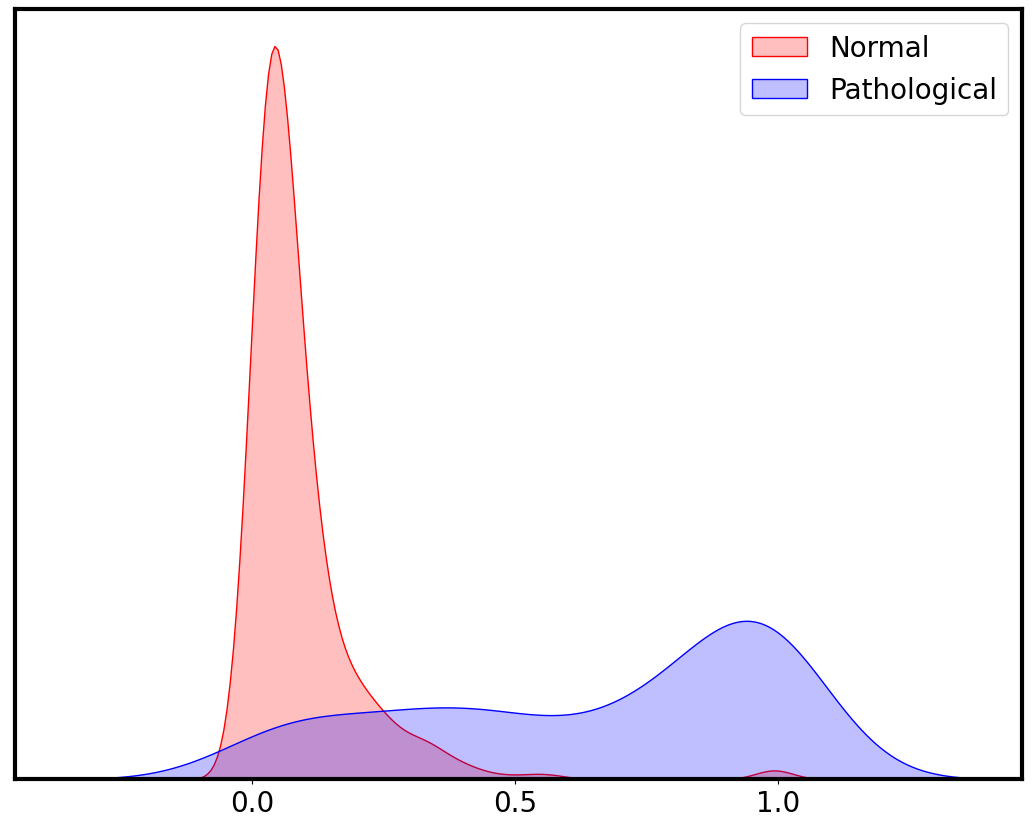

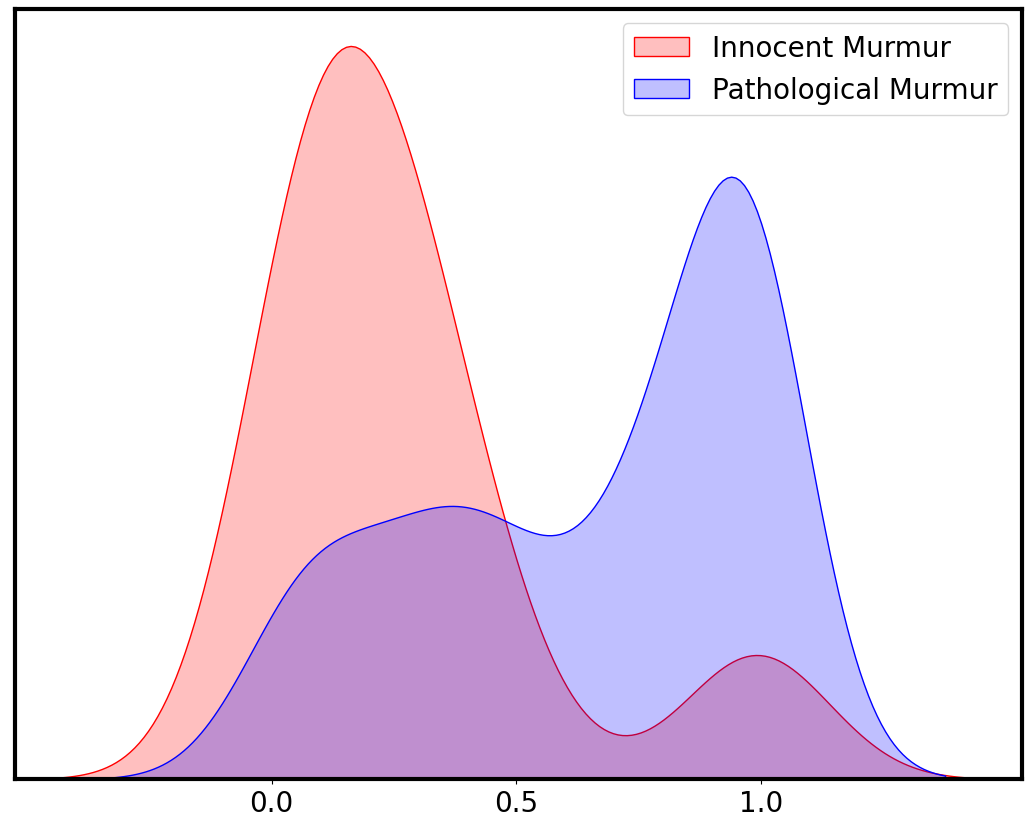

In [17]:
i = 1
plt.rcParams['figure.figsize'] = (13,10)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

ch_name = 'AV'

temp = pd.concat([train_list[i], valid_list[i], test_list[i]], axis = 0).reset_index(drop = True)
normal = temp[(temp['outcome'] == 0)&(temp['{}_strong_mean'.format(ch_name)] != -1)]
abnormal = temp[(temp['outcome'] == 1)&(temp['{}_strong_mean'.format(ch_name)] != -1)]

sns.kdeplot(normal['{}_strong_mean'.format(ch_name)], color = 'r', label = 'Normal', fill = True)
sns.kdeplot(abnormal['{}_strong_mean'.format(ch_name)], color = 'b', label = 'Pathological', fill = True)
plt.xticks([0,0.5,1])
plt.yticks([1,3,5])
plt.xlabel('')
plt.ylabel('')
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc = 'upper right')
# plt.savefig('normal_vs_pathological.svg', bbox_inches='tight', pad_inches=0)
plt.show()

temp = pd.concat([train_list[i], valid_list[i], test_list[i]], axis = 0).reset_index(drop = True)
innocent = temp[(temp['outcome'] == 0)&(temp['{}_strong_mean'.format(ch_name)] != -1)&(temp['grade'] >= 1)]
pathological = temp[(temp['outcome'] == 1)&(temp['{}_strong_mean'.format(ch_name)] != -1)&(temp['grade'] >=1)]

sns.kdeplot(innocent['{}_strong_mean'.format(ch_name)], color = 'r', label = 'Innocent Murmur', fill = True)
sns.kdeplot(pathological['{}_strong_mean'.format(ch_name)], color = 'b', label = 'Pathological Murmur', fill = True)
plt.xticks([0,0.5,1])
plt.yticks()
plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'upper right')
plt.gca().axes.yaxis.set_visible(False)
# plt.savefig('innocent_vs_pathological.svg', bbox_inches='tight', pad_inches=0)
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


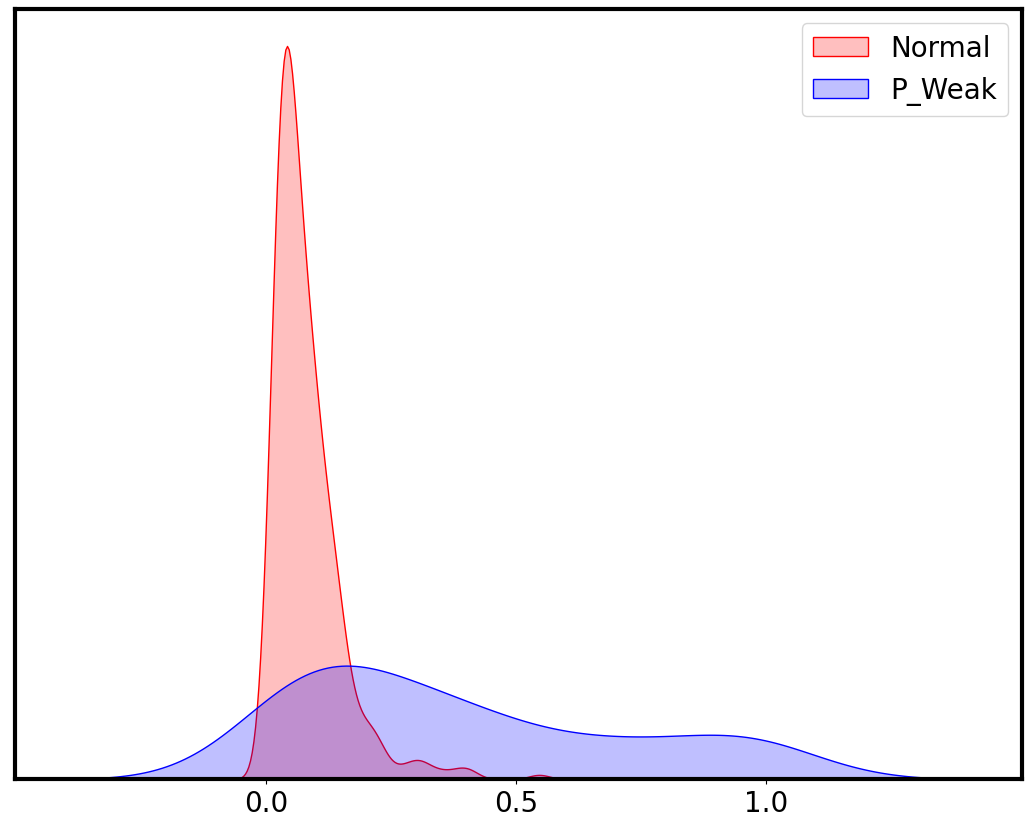

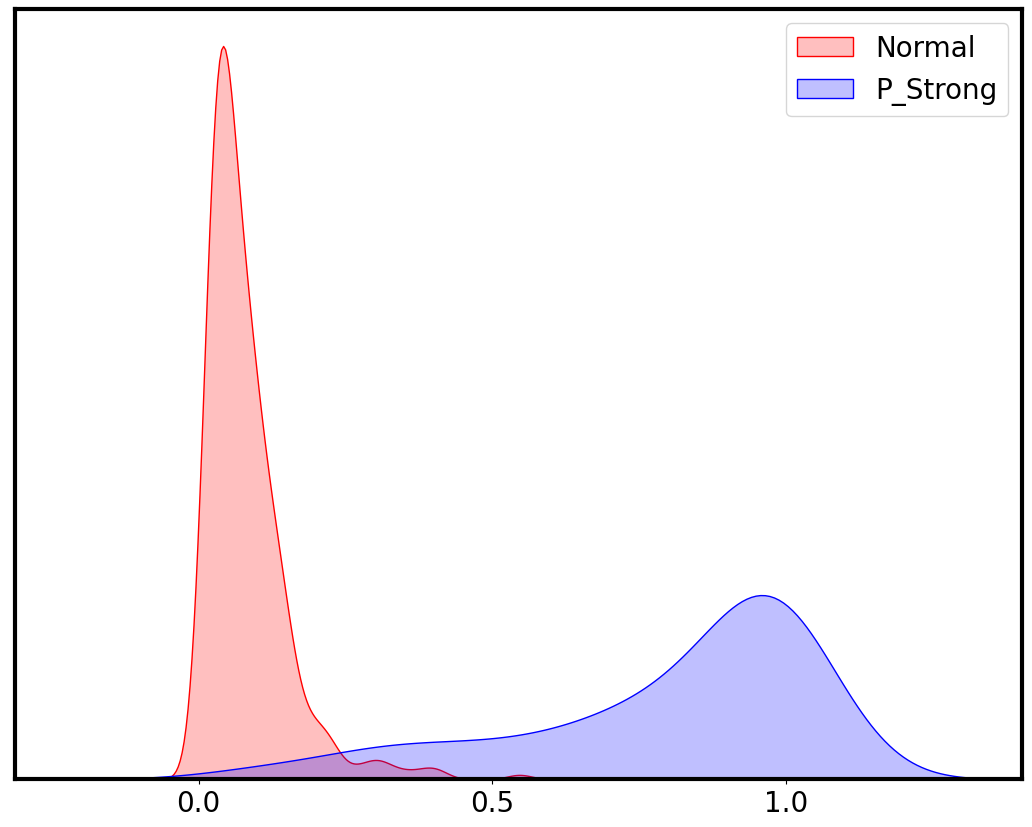

In [32]:
plt.rcParams['figure.figsize'] = (13,10)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

temp = pd.concat([train_list[1], valid_list[1], test_list[1]], axis = 0).reset_index(drop = True)
normal = temp[(temp['outcome'] == 0)&(temp['AV_strong_mean'] != -1)&(temp['grade'] == 0)]
abnormal = temp[(temp['outcome'] == 1)&(temp['AV_strong_mean'] != -1)&(temp['grade'] == 1)]

sns.kdeplot(normal['AV_strong_mean'], color = 'r', label = 'Normal', fill = True)
sns.kdeplot(abnormal['AV_strong_mean'], color = 'b', label = 'P_Weak', fill = True)
plt.xticks([0,0.5,1])
plt.yticks([1,3,5])
plt.xlabel('')
plt.ylabel('')
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc = 'upper right')
# plt.savefig('normal_vs_pathological.svg', bbox_inches='tight', pad_inches=0)
plt.show()

temp = pd.concat([train_list[1], valid_list[1], test_list[1]], axis = 0).reset_index(drop = True)
innocent = temp[(temp['outcome'] == 0)&(temp['AV_strong_mean'] != -1)&(temp['grade'] == 0)]
pathological = temp[(temp['outcome'] == 1)&(temp['AV_strong_mean'] != -1)&(temp['grade'] == 2)]

sns.kdeplot(innocent['AV_strong_mean'], color = 'r', label = 'Normal', fill = True)
sns.kdeplot(pathological['AV_strong_mean'], color = 'b', label = 'P_Strong', fill = True)
plt.xticks([0,0.5,1])
plt.yticks()
plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'upper right')
plt.gca().axes.yaxis.set_visible(False)
# plt.savefig('innocent_vs_pathological.svg', bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
results = pd.DataFrame(np.zeros((5,5)), columns = ['Sens','Spec','BACC','AUROC','AUPRC'])
results['Sens'] = sens
results['Spec'] = spec
results['BACC'] = bacc
results['AUROC'] = auroc
results['AUPRC'] = auprc
results['THR'] = thr
results.describe().round(3)

,Sens,Spec,BACC,AUROC,AUPRC,THR
count,5.000,5.000,5.000,5.000,5.000,5.000
mean,0.861,0.921,0.891,0.942,0.851,0.251
std,0.033,0.019,0.019,0.022,0.058,0.082
min,0.809,0.899,0.860,0.909,0.790,0.131
25%,0.850,0.912,0.889,0.932,0.814,0.202
50%,0.875,0.918,0.897,0.953,0.825,0.293
75%,0.879,0.929,0.899,0.957,0.912,0.302
max,0.894,0.949,0.912,0.961,0.913,0.326


In [210]:
results = pd.DataFrame(np.zeros((5,5)), columns = ['Sens','Spec','BACC','AUROC','AUPRC'])
results['Sens'] = sens
results['Spec'] = spec
results['BACC'] = bacc
results['AUROC'] = auroc
results['AUPRC'] = auprc
results['THR'] = thr
results

,Sens,Spec,BACC,AUROC,AUPRC,THR
0,0.859,0.913,0.886,0.934,0.895,0.622
1,0.859,0.953,0.906,0.963,0.923,0.777
2,0.824,0.931,0.877,0.946,0.894,0.509
3,0.847,0.931,0.889,0.952,0.908,0.684
4,0.835,0.928,0.882,0.953,0.910,0.244


# Evaluation LR vs RF

In [211]:
feature_path = '/mnt/n246/project_code/shinjaeman17/PHysioNet2022_paper/Test11_grade_class/code_submission/202402Test/results/'
models = 'tcn_sec1'

train_list = []
valid_list = []
test_list = []

for i in range(0, 5):
    temp_train = pd.read_csv(feature_path + models + '_train_fold' + str(i+1) + '.csv', index_col = 0)
    temp_valid = pd.read_csv(feature_path + models + '_valid_fold' + str(i+1) + '.csv', index_col = 0)
    temp_test = pd.read_csv(feature_path + models + '_test_fold' + str(i+1) + '.csv', index_col = 0)
    
    temp_train['mur_loc'] = temp_train['mur_loc'].fillna('none')
    temp_valid['mur_loc'] = temp_valid['mur_loc'].fillna('none')
    temp_test['mur_loc'] = temp_test['mur_loc'].fillna('none')
    
    train_list.append(temp_train)
    valid_list.append(temp_valid)
    test_list.append(temp_test)

In [212]:
sens = []
spec = []
auroc = []
auprc = []
bacc = []
thr = []
input_col1 = 'median'
input_col2 = 'max'
input_col3 = 'min'

for i in range(0,5):
    pos_wave = []
    neg_wave = []
    pos_y = []
    neg_y = []
    training_patient = pd.concat([train_list[i]], axis = 0).reset_index(drop = True)
    # training_patient = pd.concat([train_list[i], valid_list[i]], axis = 0).reset_index(drop = True)
    for j in range(0, len(training_patient)):
        if (training_patient['grade'][j] == 0)&(training_patient['outcome'][j] == 0): # Normal
            neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 0): # Innocent murmur
            neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 1): # Pathological murmur
            murmur_aus = training_patient['mur_loc'][j].split('+')
            if 'AV' in murmur_aus:
                pos_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'AV' not in murmur_aus:
                neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'PV' in murmur_aus:
                pos_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'PV' not in murmur_aus:
                neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'TV' in murmur_aus:
                pos_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'TV' not in murmur_aus:
                neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'MV' in murmur_aus:
                pos_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'MV' not in murmur_aus:
                neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
                neg_y.append(0)

    train_x = pos_wave + neg_wave
    train_y = pos_y + neg_y

    train_x = np.array(train_x)
    train_y = np.array(train_y)

    idx = []
    for null_idx in range(0, len(train_x)):
        if train_x[null_idx][0] != -1:
            idx.append(null_idx)
            
    train_x = train_x[idx]
    train_y = train_y[idx]
    #############################################################################
    pos_wave = []
    neg_wave = []
    pos_y = []
    neg_y = []
    training_patient = pd.concat([valid_list[i]], axis = 0).reset_index(drop = True)
    # training_patient = pd.concat([test_list[i]], axis = 0).reset_index(drop = True)
    for j in range(0, len(training_patient)):
        if (training_patient['grade'][j] == 0)&(training_patient['outcome'][j] == 0): # Normal
            neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 0): # Innocent murmur
            neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
            neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
            neg_y.append(0)
        if (training_patient['grade'][j] >= 1)&(training_patient['outcome'][j] == 1): # Pathological murmur
            murmur_aus = training_patient['mur_loc'][j].split('+')
            if 'AV' in murmur_aus:
                pos_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'AV' not in murmur_aus:
                neg_wave.append([training_patient['AV_strong_'+input_col1][j], training_patient['AV_strong_'+input_col2][j], training_patient['AV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'PV' in murmur_aus:
                pos_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'PV' not in murmur_aus:
                neg_wave.append([training_patient['PV_strong_'+input_col1][j], training_patient['PV_strong_'+input_col2][j], training_patient['PV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'TV' in murmur_aus:
                pos_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'TV' not in murmur_aus:
                neg_wave.append([training_patient['TV_strong_'+input_col1][j], training_patient['TV_strong_'+input_col2][j], training_patient['TV_strong_'+input_col3][j]])
                neg_y.append(0)

            if 'MV' in murmur_aus:
                pos_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
                pos_y.append(1)
            if 'MV' not in murmur_aus:
                neg_wave.append([training_patient['MV_strong_'+input_col1][j], training_patient['MV_strong_'+input_col2][j], training_patient['MV_strong_'+input_col3][j]])
                neg_y.append(0)

    valid_x = pos_wave + neg_wave
    valid_y = pos_y + neg_y

    valid_x = np.array(valid_x)
    valid_y = np.array(valid_y)

    idx = []
    for null_idx in range(0, len(valid_x)):
        if valid_x[null_idx][0] != -1:
            idx.append(null_idx)
            
    valid_x = valid_x[idx]
    valid_y = valid_y[idx]

    arr = np.arange(len(train_x))
    np.random.seed(1)
    np.random.shuffle(arr)
    train_x = train_x[arr]
    train_y = train_y[arr]
    
    # clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', class_weight = {0:1, 1:5}, random_state = 0) # penalty = 'l1', solver = 'liblinear', class_weight = {0:1, 1:5}, random_state = 0
    clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 0, class_weight = {0:1, 1:5})
    clf.fit(train_x, train_y)
    
    pred_train = clf.predict_proba(train_x)[:,1]
    th = metrics_for_binary_classification(train_y, pred_train, pos_label = 1, threshold_option = 'j_index')['Threshold'].round(3)
    thr.append(th)
    pred_valid = clf.predict_proba(valid_x)[:,1]
    sens.append(metrics_for_binary_classification(valid_y, pred_valid, pos_label = 1, threshold_option = th)['Sensitivity'].round(3))
    spec.append(metrics_for_binary_classification(valid_y, pred_valid, pos_label = 1, threshold_option = th)['Specificity'].round(3))
    bacc.append(metrics_for_binary_classification(valid_y, pred_valid, pos_label = 1, threshold_option = th)['BACC'].round(3))
    auroc.append(metrics_for_binary_classification(valid_y, pred_valid, pos_label = 1, threshold_option = th)['AUROC'].round(3))
    auprc.append(metrics_for_binary_classification(valid_y, pred_valid, pos_label = 1, threshold_option = th)['AUPRC'].round(3))

In [213]:
results = pd.DataFrame(np.zeros((5,5)), columns = ['Sens','Spec','BACC','AUROC','AUPRC'])
results['Sens'] = sens
results['Spec'] = spec
results['BACC'] = bacc
results['AUROC'] = auroc
results['AUPRC'] = auprc
results['THR'] = thr
results.describe().round(3)

,Sens,Spec,BACC,AUROC,AUPRC,THR
count,5.000,5.000,5.000,5.000,5.000,5.000
mean,0.862,0.923,0.892,0.942,0.849,0.384
std,0.037,0.010,0.021,0.021,0.054,0.111
min,0.809,0.908,0.858,0.908,0.790,0.215
25%,0.848,0.919,0.889,0.942,0.817,0.369
50%,0.859,0.922,0.897,0.943,0.825,0.398
75%,0.894,0.930,0.908,0.951,0.893,0.414
max,0.900,0.934,0.910,0.965,0.918,0.524


In [202]:
results = pd.DataFrame(np.zeros((5,5)), columns = ['Sens','Spec','BACC','AUROC','AUPRC'])
results['Sens'] = sens
results['Spec'] = spec
results['BACC'] = bacc
results['AUROC'] = auroc
results['AUPRC'] = auprc
results['THR'] = thr
results

,Sens,Spec,BACC,AUROC,AUPRC,THR
0,0.894,0.872,0.883,0.926,0.892,0.163
1,0.847,0.907,0.877,0.933,0.881,0.249
2,0.847,0.897,0.872,0.930,0.882,0.464
3,0.859,0.900,0.880,0.946,0.898,0.430
4,0.847,0.897,0.872,0.939,0.889,0.251
